# Day 5：基础可视化（表达与比较）

> 今日目标：掌握折线、柱状、条形、散点、直方图及 2×2 子图布局；能为图表添加标题、轴标签、图例、来源说明，写出 1~2 句解读。

学习路径：
1. 准备数据 & 为什么先学 matplotlib
2. 折线图（趋势）
3. 柱状 / 条形图（比较）
4. 散点图（关系）
5. 直方图（分布）
6. 2×2 子图面板 (监测面板)
7. 可视化基本美化 Checklist
8. Mini Case：构建空气质量监测面板
9. 小结
10. 课后作业提示

## 1. 准备数据 & 为什么先学 matplotlib
数据：沿用 Day 4 的 `air_quality_timeseries.csv`。

为什么先学 matplotlib：
- 底层：很多高级库（seaborn）是它的封装。
- 控制力强：标题、颜色、刻度、子图布局都可精调。

常用导入约定：`import matplotlib.pyplot as plt`。
Jupyter 中显示：只要执行生成图的代码单元即可（不必再写 %matplotlib inline，现代 Jupyter 默认开启）。

这里演示了如何使用 NumPy 生成等间距的数组，并用 Matplotlib 绘制正弦曲线。  
- `np.linspace` 和 `np.arange` 都可生成数值序列，分别用于不同精度需求。  
- `plt.plot` 绘制两组正弦曲线，并通过 `plt.legend()` 添加图例，便于区分不同生成方式。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0, 10, 100)
y1 = np.sin(x1)
x2 = np.arange(0,10,0.1)
y2 = np.sin(x2)

plt.plot(x1, y1, label='linspace')
plt.plot(x2, y2, label='arange')
plt.legend()

如何自定义正弦和余弦曲线的样式呢？
- 使用不同颜色、线型、线宽和标记点绘制 sin 和 cos 曲线。  
- 设置坐标轴标签、刻度（以 π 为单位），以及图表标题，提升可读性和美观性。

Text(0.5, 1.0, 'Sine and Cosine Waves')

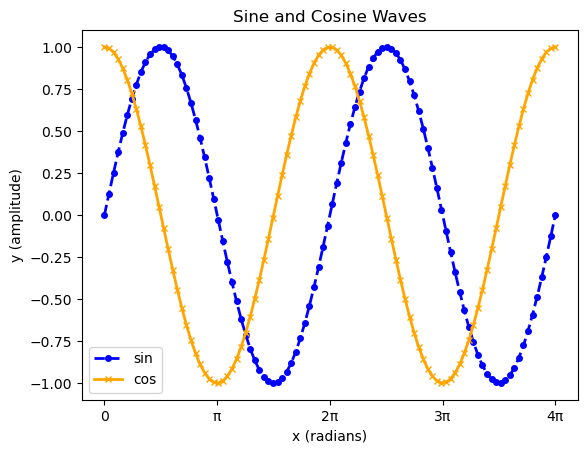

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(0, 4*np.pi, 100)
y1 = np.sin(x1)
y2 = np.cos(x1)
plt.plot(x1, y1, label='sin', color='blue', linestyle='--', linewidth=2, marker='o', markersize=4)
plt.plot(x1, y2, label='cos', color='orange', linestyle='-', linewidth=2, marker='x', markersize=4)
plt.legend()
plt.xlabel('x (radians)')
plt.ylabel('y (amplitude)')
plt.xticks(ticks=np.arange(0, 4.5*np.pi, np.pi),
           labels=['0', 'π', '2π', '3π', '4π'])
plt.title('Sine and Cosine Waves')  

如何利用设置 Matplotlib 中文字体？
再次绘制 sin 和 cos 曲线：  
- 通过 `plt.rcParams['font.sans-serif']` 指定中文字体，解决中文显示问题。  
- 设置负号正常显示。  
- 图表标题使用中文，演示如何在图中显示中文内容，并添加网格线。

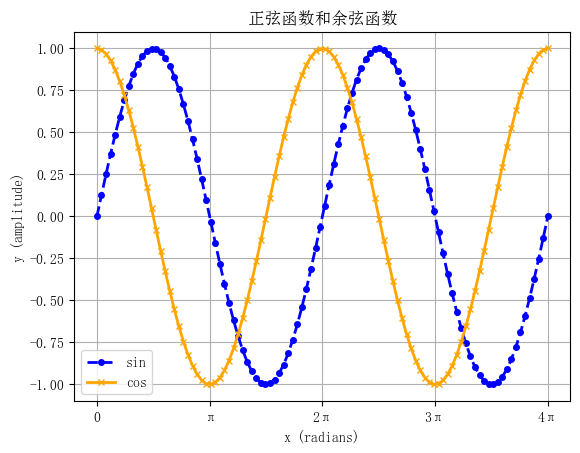

In [ ]:
# 选择一个已安装的中文字体（若找到则设置，否则提示）
from matplotlib import font_manager as fm
fonts_to_try = ['SimHei', 'Microsoft YaHei', 'SimSun', 'Noto Sans CJK SC', 'Arial Unicode MS']
plt.rcParams['font.sans-serif'] = ['SimSun']  # 默认字体

# 让负号正常显示
plt.rcParams['axes.unicode_minus'] = False

# 绘图
plt.figure()
plt.plot(x1, y1, label='sin', color='blue', linestyle='--', linewidth=2, marker='o', markersize=4)
plt.plot(x1, y2, label='cos', color='orange', linestyle='-', linewidth=2, marker='x', markersize=4)
plt.legend()
plt.xlabel('x (radians)')
plt.ylabel('y (amplitude)')
plt.xticks(ticks=np.arange(0, 4.5*np.pi, np.pi),
           labels=['0', 'π', '2π', '3π', '4π'])
plt.title('正弦函数和余弦函数')  # 中文标题
plt.grid(True)

如何绘制分类数据的柱状图？
- 构造水果类别和销量数据，使用不同颜色绘制柱状图。  
- 设置 x 轴为中文类别，y 轴为数量，并在每个柱子顶部显示具体数值。  
- 图表美化包括网格线和布局调整。

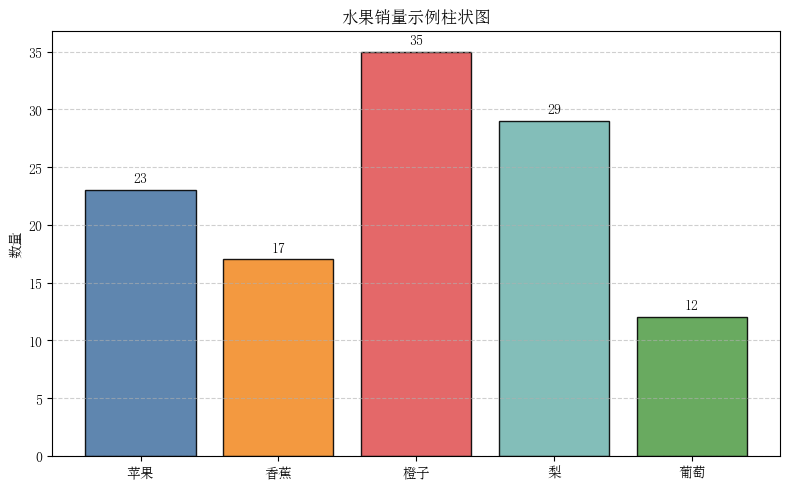

In [ ]:
# 示例：分类数据柱状图
categories = ['苹果', '香蕉', '橙子', '梨', '葡萄']
values = [23, 17, 35, 29, 12]
x = np.arange(len(categories))

plt.figure(figsize=(8,5))
bars = plt.bar(x, values, color=['#4e79a7','#f28e2b','#e15759','#76b7b2','#59a14f'], edgecolor='k', alpha=0.9)
plt.xticks(x, categories)
plt.ylabel('数量')
plt.title('水果销量示例柱状图')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 在柱子上显示数值
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 0.5, str(h), ha='center', va='bottom')

plt.tight_layout()
plt.show()

如何进行饼图的绘制方法和突出显示最大值？
- 使用中文字体，设置饼图颜色和阴影。  
- 通过 `explode` 参数突出最大值，`autopct` 显示百分比和数量。  
- 美化标签字体，设置标题，并保证饼图为正圆。

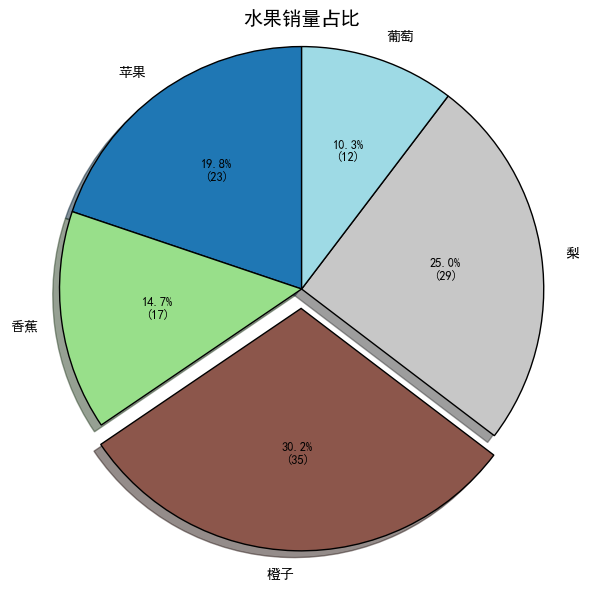

In [ ]:
# 饼图示例：使用已有的 categories 和 values
plt.rcParams['font.sans-serif'] = fonts_to_try  # 尝试使用已准备的中文字体列表
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(6,6))
# 将最大值稍微突出显示
explode = [0.08 if v == max(values) else 0 for v in values]
colors = plt.get_cmap('tab20')(np.linspace(0, 1, len(values)))

def autopct_with_count(pct):
    total = sum(values)
    count = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n({count})"

wedges, texts, autotexts = ax.pie(
    values,
    labels=categories,
    autopct=autopct_with_count,
    startangle=90,
    explode=explode,
    colors=colors,
    shadow=True,
    wedgeprops={'edgecolor': 'k'}
)

# 美化文本
for t in texts:
    t.set_fontsize(10)
for at in autotexts:
    at.set_fontsize(9)

ax.set_title('水果销量占比', fontsize=14)
ax.axis('equal')  # 使饼图为正圆
plt.tight_layout()
plt.show()


## 如何将 Matplotlib 与 Pandas 结合？
下面的代码演示了如何结合 Pandas 的数据处理能力与 Matplotlib 的可视化功能，快速绘制和美化数据图表。通过 Pandas 直接调用 plot 方法，可以方便地生成折线图、柱状图等，并利用 Matplotlib 进一步自定义样式和细节

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager as fm
fonts_to_try = ['SimHei', 'Microsoft YaHei', 'SimSun', 'Noto Sans CJK SC', 'Arial Unicode MS']
plt.rcParams['font.sans-serif'] = ['SimSun']  # 默认字体

# 让负号正常显示
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('../data/air_quality_timeseries.csv', parse_dates=['date'])
df.head()

,date,city,province,PM25,PM10,NO2,SO2
0,2025-09-01,广州,广东,42,55,19,7
1,2025-09-02,广州,广东,41,54,18,7
2,2025-09-03,广州,广东,39,50,17,6
3,2025-09-04,广州,广东,45,57,20,7
4,2025-09-05,广州,广东,44,56,19,7


为了方便绘制城市趋势，先挑几个城市：广州 / 北京 / 上海。

In [3]:
cities = ['广州','北京','上海']
df_sub = df[df['city'].isin(cities)]
df_sub.head()

,date,city,province,PM25,PM10,NO2,SO2
0,2025-09-01,广州,广东,42,55,19,7
1,2025-09-02,广州,广东,41,54,18,7
2,2025-09-03,广州,广东,39,50,17,6
3,2025-09-04,广州,广东,45,57,20,7
4,2025-09-05,广州,广东,44,56,19,7


## 2. 折线图（展示时间趋势）
适合：时间序列变化。
步骤：过滤 → 按日期排序 → plot。

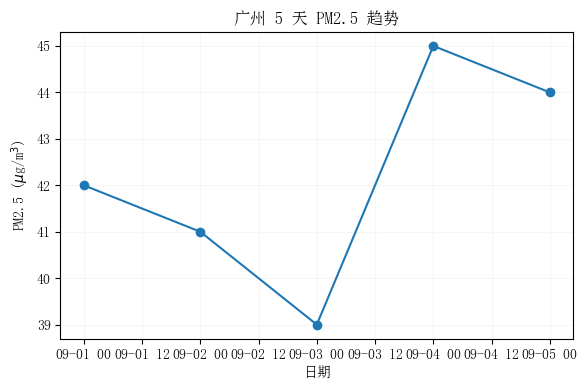

In [15]:
# 单城市折线
gz = df[df['city']=='广州'].sort_values('date')
plt.figure(figsize=(6,4))
plt.plot(gz['date'], gz['PM25'], marker='o')
plt.title('广州 5 天 PM2.5 趋势')
plt.xlabel('日期')
plt.ylabel(r'PM2.5 ($\mu$g/m$^3$)')
plt.grid(alpha=0.1)
plt.tight_layout()
plt.show()

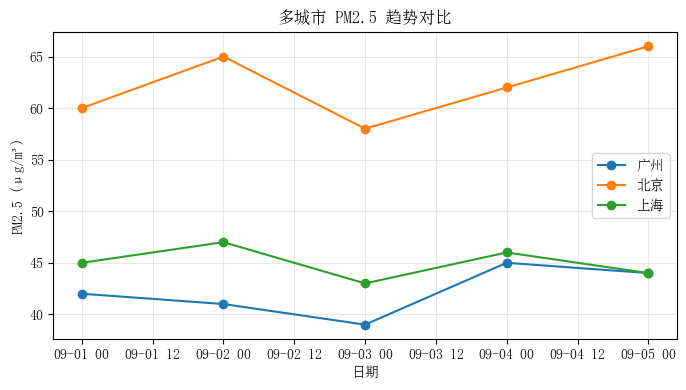

In [4]:
# 多城市同图比较：循环绘制
plt.figure(figsize=(7,4))
for c in cities:
    tmp = df[df['city']==c].sort_values('date')
    plt.plot(tmp['date'], tmp['PM25'], marker='o', label=c)
plt.title('多城市 PM2.5 趋势对比')
plt.xlabel('日期')
plt.ylabel('PM2.5 (μg/m³)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
df = pd.read_csv('../data/air_quality_timeseries.csv', parse_dates=['date'])
df.set_index('date', inplace=True)
df.head()

,city,province,PM25,PM10,NO2,SO2
date,,,,,,
2025-09-01,广州,广东,42,55,19,7
2025-09-02,广州,广东,41,54,18,7
2025-09-03,广州,广东,39,50,17,6
2025-09-04,广州,广东,45,57,20,7
2025-09-05,广州,广东,44,56,19,7


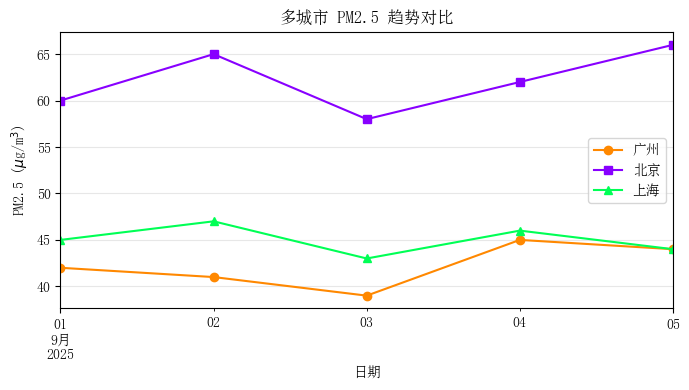

In [37]:
cities = ['广州','北京','上海']
markers = ['o','s','^']
colors = ['FF8800','8800FF','00FF55']

for i, c in enumerate(cities):
    df[df['city']==c]['PM25'].plot(label=c, marker=markers[i], color='#'+colors[i], figsize=(7,4))
plt.title('多城市 PM2.5 趋势对比')
plt.xlabel('日期')
plt.ylabel(r'PM2.5 ($\mu$g/m$^3$)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### 小练习 1
1. 把上面多城市图中的 marker 改成 's' (方形)。
2. 去掉网格线，观察视觉差异。
3. 尝试只显示北京和上海。

## 3. 柱状图（比较）
适合：类别之间比较。
展示：不同城市的 PM25 平均值。

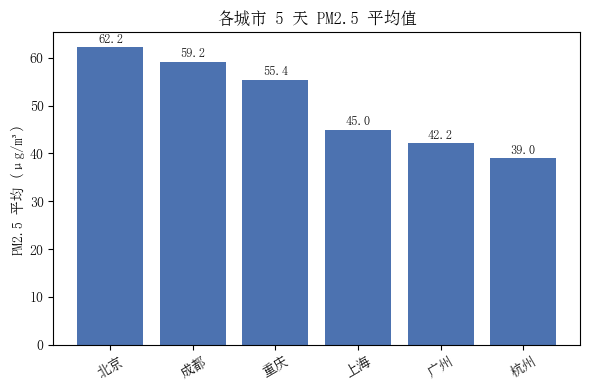

In [5]:


city_mean = df.groupby('city')['PM25'].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
plt.bar(city_mean.index, city_mean.values, color='#4C72B0')
plt.title('各城市 5 天 PM2.5 平均值')
plt.ylabel('PM2.5 平均 (μg/m³)')
plt.xticks(rotation=30)
# 在柱顶加数值标签
for x, y in enumerate(city_mean.values):
    plt.text(x, y+0.5, f'{y:.1f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

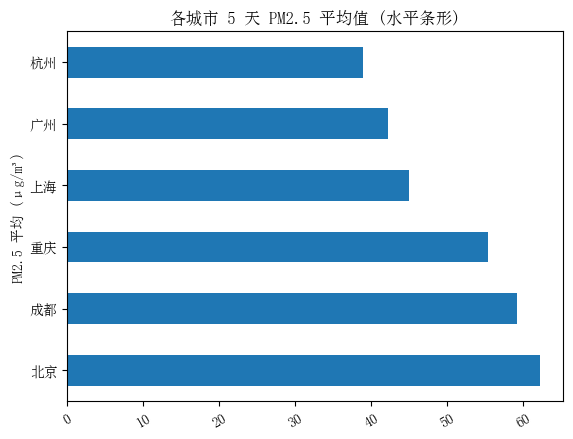

In [55]:
df.groupby('city')['PM25'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title('各城市 5 天 PM2.5 平均值 (水平条形)')
plt.ylabel('PM2.5 平均 (μg/m³)')
plt.xticks(rotation=30)

也可以画水平条形图 (当城市名称很多更易读)。

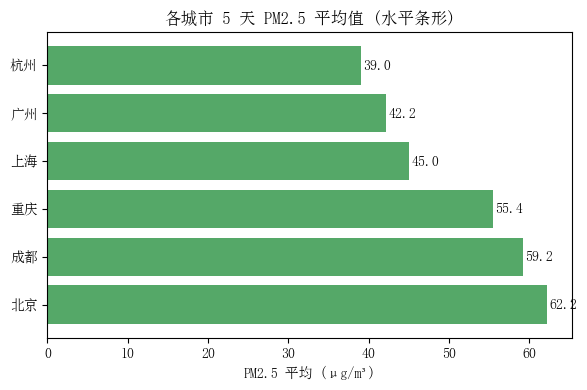

In [6]:
plt.figure(figsize=(6,4))
plt.barh(city_mean.index, city_mean.values, color='#55A868')
plt.title('各城市 5 天 PM2.5 平均值 (水平条形)')
plt.xlabel('PM2.5 平均 (μg/m³)')
for y, v in enumerate(city_mean.values):
    plt.text(v+0.3, y, f'{v:.1f}', va='center')
plt.tight_layout()
plt.show()

### 小练习 2
1. 将颜色改成自定义列表，例如 ['#d62728','#1f77b4',...]。
2. 只画出 PM25 平均值最高的前 5 个城市。

## 4. 散点图（关系）
适合：两个数值变量关系 (相关趋势/聚集/异常)。
示例：PM25 vs PM10。

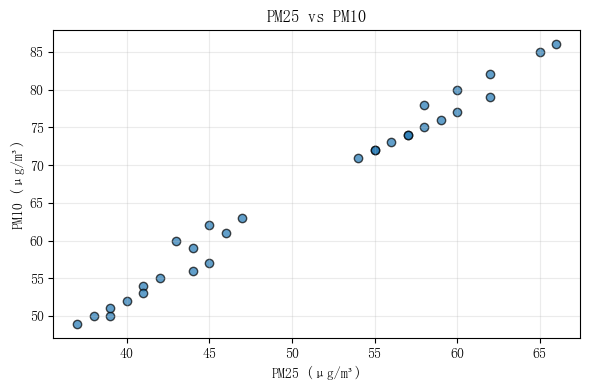

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(df['PM25'], df['PM10'], alpha=0.7, edgecolor='k')
plt.title('PM25 vs PM10')
plt.xlabel('PM25 (μg/m³)')
plt.ylabel('PM10 (μg/m³)')
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

按城市上色：为每个点添加颜色标签。

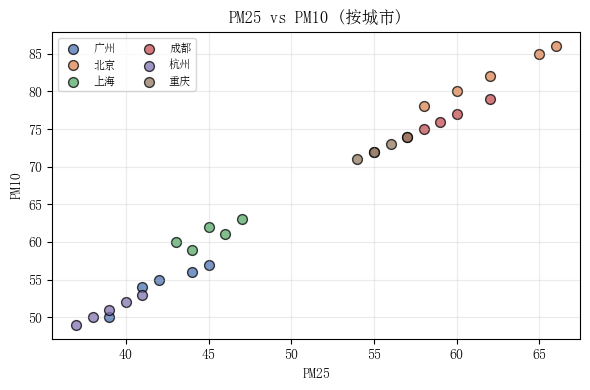

In [8]:
import itertools
colors = itertools.cycle(['#4C72B0','#DD8452','#55A868','#C44E52','#8172B2','#937860'])
plt.figure(figsize=(6,4))
for c in df['city'].unique():
    tmp = df[df['city']==c]
    plt.scatter(tmp['PM25'], tmp['PM10'], label=c, s=50, alpha=0.75, edgecolor='k', c=next(colors))
plt.title('PM25 vs PM10 (按城市)')
plt.xlabel('PM25')
plt.ylabel('PM10')
plt.legend(ncol=2, fontsize=8)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

### 小练习 3
1. 改变点大小 s=80 观察效果。
2. 设置 alpha=0.4 查看重叠情况。
3. 思考：什么情况下适合散点图换成气泡图 (第三个变量控制大小)。

## 5. 直方图（分布）
展示数据在不同区间的频次。示例：所有城市 PM25 分布。

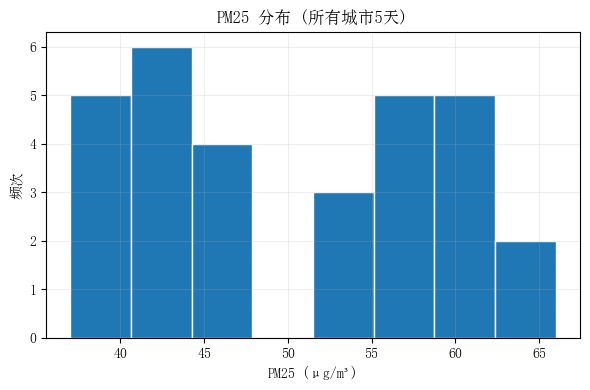

In [9]:
plt.figure(figsize=(6,4))
plt.hist(df['PM25'], bins=8, color='#1f77b4', edgecolor='white')
plt.title('PM25 分布 (所有城市5天)')
plt.xlabel('PM25 (μg/m³)')
plt.ylabel('频次')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

对比分布：可以按城市分别画（今天不要求全部掌握，可尝试）。

### 小练习 4
1. 改 bins=5 和 bins=12 比较分辨率变化。
2. 尝试给直方图加上透明度 alpha=0.7。

## 6. 2×2 子图面板 (监测面板)
使用 plt.subplots(rows, cols, figsize=(w,h))。返回 fig, axes。
示例：面板包含：
(1) 广州 PM25 折线
(2) 城市 PM25 平均柱状
(3) PM25 vs PM10 散点
(4) PM25 直方图

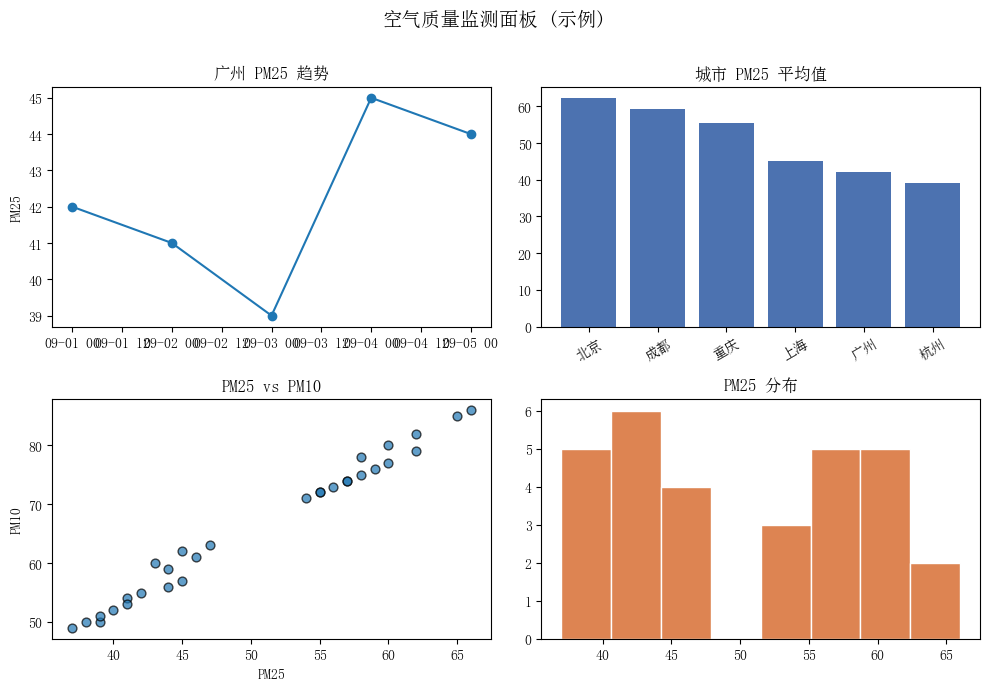

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10,7))
# (1) 折线
ax = axes[0,0]
tmp = df[df['city']=='广州'].sort_values('date')
ax.plot(tmp['date'], tmp['PM25'], marker='o')
ax.set_title('广州 PM25 趋势')
ax.set_ylabel('PM25')
# (2) 柱状
ax = axes[0,1]
ax.bar(city_mean.index, city_mean.values, color='#4C72B0')
ax.set_title('城市 PM25 平均值')
ax.tick_params(axis='x', rotation=30)
# (3) 散点
ax = axes[1,0]
ax.scatter(df['PM25'], df['PM10'], alpha=0.7, edgecolor='k', s=40)
ax.set_title('PM25 vs PM10')
ax.set_xlabel('PM25')
ax.set_ylabel('PM10')
# (4) 直方
ax = axes[1,1]
ax.hist(df['PM25'], bins=8, color='#DD8452', edgecolor='white')
ax.set_title('PM25 分布')
plt.suptitle('空气质量监测面板 (示例)', fontsize=14)
plt.tight_layout(rect=[0,0,1,0.97])
plt.show()

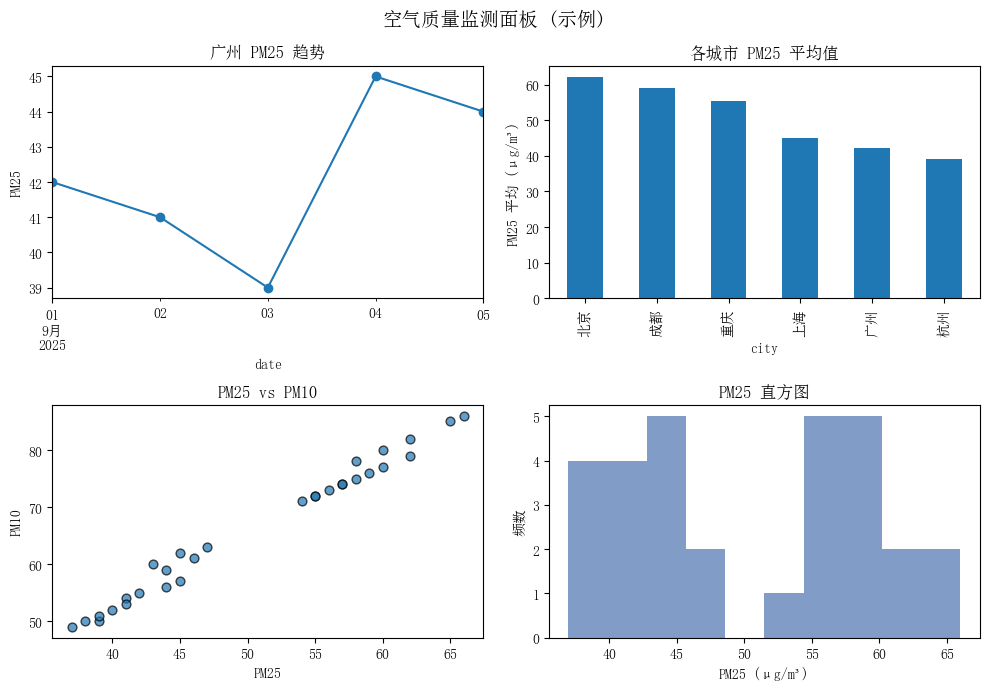

In [70]:
df = pd.read_csv('../data/air_quality_timeseries.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

fig, axes = plt.subplots(2, 2, figsize=(10,7))
# (1) 折线
df[df['city']=='广州']['PM25'].plot(ax=axes[0,0], marker='o', title='广州 PM25 趋势', ylabel='PM25')
# (2) 柱状
df.groupby('city')['PM25'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[0,1], title='各城市 PM25 平均值', ylabel='PM25 平均 (μg/m³)')
# (3) 散点
df.plot.scatter(x='PM25', y='PM10', ax=axes[1,0], alpha=0.7, edgecolor='k', s=40, title='PM25 vs PM10')
# (4) 直方图
df['PM25'].plot(kind='hist', ax=axes[1,1], bins=10, alpha=0.7, color='#4C72B0', title='PM25 直方图', xlabel='PM25 (μg/m³)', ylabel='频数')  
plt.suptitle('空气质量监测面板 (示例)', fontsize=14)
plt.tight_layout()

### 小练习 5
1. 把 (1) 图改成北京。
2. 给 (3) 散点图添加网格。
3. 修改总标题字体大小为 16。

## 7. 可视化基本美化 Checklist
| 项 | 检查点 |
|----|--------|
| 标题 | 概括主要信息 |
| 轴标签 | 单位是否注明 |
| 刻度 | 是否重叠 / 是否需要旋转 |
| 颜色 | 不要过多 (≤6)，对比清晰 |
| 图例 | 放置不遮挡数据 |
| 网格 | 轻微 (alpha 小) 辅助阅读 |
| 数据标注 | 必要时标记关键值 |
| 来源 | 数据来源 / 时间范围 |
| 解读 | 1~2 句文字说明核心发现 |

## 8. Mini Case：构建自己的面板
任务：制作一个 2×2 面板 (或 1×3, 2×3)，包含：
1. 任意城市 PM25 时间趋势
2. 城市 PM25 平均值比较 (柱状)
3. PM25 vs PM10 散点
4. PM25 分布 (直方)
并：
- 添加总标题 + 数据来源 (可用注释或 fig.text)
- 对其中 1 张图添加文字标注 annotate 说明最高值
- 写出 2 句解释：一条关于趋势，一条关于比较或关系。

(请在下方新建单元格自行完成)

## 9. 小结
- 图表选择匹配信息类型：折线=趋势；柱状/条形=类别比较；散点=关系；直方=分布；面板=多视角集成。
- 基础规范：标题/轴标签/单位/图例/适度网格/必要数据标注/来源。
- 颜色与布局重在“清晰”与“少即是多”。
- 解读文字需说明：现象 + 对比/趋势 + 可能含义（避免过度推断）。

实践提示：先草稿（手画信息层次），再编码绘制；养成复用代码片段的习惯（如统一样式函数）。
后续衔接：规范可视化输出将直接提升 Day 6 mini 项目表达质量。

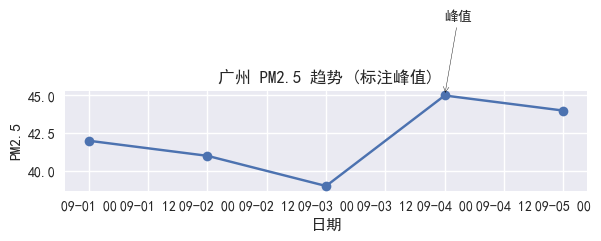

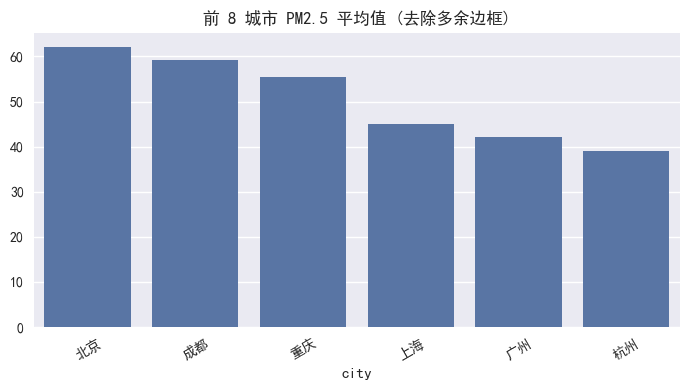

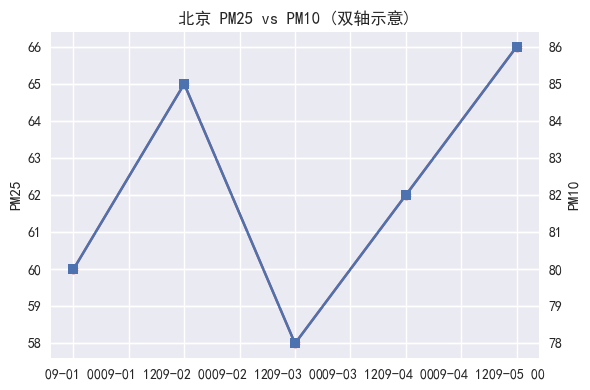

In [11]:
# 可视化进阶代码示例
import pandas as pd, matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
df = pd.read_csv('../data/air_quality_timeseries.csv', parse_dates=['date'])

# 1. 自定义字体(若环境支持)——示意：
import matplotlib; matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['axes.unicode_minus']=False

# 2. 标注峰值
city_series = df[df['city']=='广州'].sort_values('date')
xmax_row = city_series.loc[city_series['PM25'].idxmax()]
plt.figure(figsize=(6,4))
plt.plot(city_series['date'], city_series['PM25'], marker='o')
plt.title('广州 PM2.5 趋势 (标注峰值)')
plt.xlabel('日期'); plt.ylabel('PM2.5')
plt.annotate('峰值', xy=(xmax_row['date'], xmax_row['PM25']), xytext=(xmax_row['date'], xmax_row['PM25']+5), arrowprops={'arrowstyle':'->'})
plt.tight_layout(); plt.show()

# 3. 去除顶部/右侧边框
import seaborn as sns
city_mean = df.groupby('city')['PM25'].mean().sort_values(ascending=False).head(8)
plt.figure(figsize=(7,4))
ax = sns.barplot(x=city_mean.index, y=city_mean.values, color='#4C72B0')
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)
plt.xticks(rotation=30)
plt.title('前 8 城市 PM2.5 平均值 (去除多余边框)')
plt.tight_layout(); plt.show()

# 4. 双轴示意（谨慎使用）
sample = df[df['city']=='北京'].sort_values('date')
fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()
ax1.plot(sample['date'], sample['PM25'], color='#C44E52', marker='o', label='PM25')
ax2.plot(sample['date'], sample['PM10'], color='#4C72B0', marker='s', label='PM10')
ax1.set_ylabel('PM25'); ax2.set_ylabel('PM10')
ax1.set_title('北京 PM25 vs PM10 (双轴示意)')
fig.tight_layout(); plt.show()

### 可视化进阶与细节控制
1. 统一风格：plt.style.use('seaborn-v0_8') 或自定义 rcParams。
2. 字体/中文：plt.rcParams['font.family']='SimHei'; 避免负号乱码：rcParams['axes.unicode_minus']=False。
3. 色板：手动构建有限调色板，强调主色 + 辅助色。
4. 标注 annotate：ax.annotate('峰值', xy=(x,y), xytext=(x,y+5), arrowprops={'arrowstyle':'->'})。
5. 次轴：ax2 = ax.twinx() (仅在确需双尺度且清晰标注时使用)。
6. 子图共享轴：plt.subplots(..., sharex=True)。
7. 图表信息密度：删除不必要边框 (ax.spines['top'].set_visible(False))。
8. 保存输出：plt.savefig('figure.png', dpi=150, bbox_inches='tight')。
9. 布局拥挤处理：旋转刻度 / 缩写标签 / 适度截断。
10. 颜色语义：红=高风险 / 绿=良好，保持一致性。

## 10. 课后作业提示
在 *homework_day5.ipynb*：
1. 选 3 种不同图类型展示同一主题的不同角度 (例如：趋势+比较+关系)。
2. 每幅图满足：标题 / 轴标签 / 单位 / (必要) 图例。
3. 写 150 字图表说明（至少 3 条发现 + 1 条数据局限或下一步建议）。
4. 附上数据来源说明。
(可选) 5. 尝试用 annotate 标出异常或峰值。

---
📌 提示：明天 (Day 6) 将做合并与 mini 项目，请保留计算逻辑清晰的 Notebook，便于复用。